In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("world-education-data.csv")

#Data Preprocessing


In [5]:
# checking for missing values
print(df.isnull().sum())

df = df.dropna()

print(df.isnull().sum())

#checking duplicates
print(df.duplicated().sum())


country                          0
country_code                     0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64
country                       0
country_code                  0
year                          0
gov_exp_pct_gdp               0
lit_rate_adult_pct            0
pri_comp_rate_pct             0
pupil_teacher_primary         0
pupil_teacher_secondary       0
school_enrol_primary_pct      0
school_enrol_secondary_pct    0
school_enrol_tertiary_pct     0
dtype: int64
0


In [6]:
df.rename(columns={
    'country': 'Country',
    'country_code': 'Country Code',
    'year': 'Year',
    'gov_exp_pct_gdp': 'Government Expenditure (GDP)',
    'lit_rate_adult_pct': 'Adult Literacy Rate',
    'pri_comp_rate_pct': 'Primary Completion Rate',
    'pupil_teacher_primary': 'Pupil-Teacher Ratio (Primary)',
    'pupil_teacher_secondary': 'Pupil-Teacher Ratio (Secondary)',
    'school_enrol_primary_pct': 'Primary School Enrollment Rate',
    'school_enrol_secondary_pct': 'Secondary School Enrollment Rate',
    'school_enrol_tertiary_pct': 'Tertiary School Enrollment Rate'
}, inplace=True)

df.head()

,Country,Country Code,Year,Government Expenditure (GDP),Adult Literacy Rate,Primary Completion Rate,Pupil-Teacher Ratio (Primary),Pupil-Teacher Ratio (Secondary),Primary School Enrollment Rate,Secondary School Enrollment Rate,Tertiary School Enrollment Rate
82,Albania,ALB,2008,3.509226,96.000000,109.742630,19.40780,16.79416,100.383003,87.833839,31.683960
85,Albania,ALB,2011,3.240008,97.000000,100.500961,19.86917,15.24414,101.580269,95.470528,49.399700
86,Albania,ALB,2012,3.309061,97.000000,117.008469,19.48298,14.89293,102.067360,97.608070,58.621422
91,Albania,ALB,2017,3.611720,98.816231,106.449692,17.94478,11.60265,105.414970,97.574371,58.017780
194,Arab World,ARB,2002,5.032867,67.294632,76.780457,21.79427,16.50426,88.439278,60.709721,18.825260


In [130]:
unique_years = df['Year'].unique()

# Print unique years
unique_years_sorted = sorted(unique_years)
print("Sorted unique years in the dataset:", unique_years_sorted)

Sorted unique years in the dataset: [np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]


In [8]:
df.to_csv("preprocessed_data.csv")


In [9]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

,Unnamed: 0,Country,Country Code,Year,Government Expenditure (GDP),Adult Literacy Rate,Primary Completion Rate,Pupil-Teacher Ratio (Primary),Pupil-Teacher Ratio (Secondary),Primary School Enrollment Rate,Secondary School Enrollment Rate,Tertiary School Enrollment Rate
0,82,Albania,ALB,2008,3.509226,96.000000,109.742630,19.40780,16.79416,100.383003,87.833839,31.683960
1,85,Albania,ALB,2011,3.240008,97.000000,100.500961,19.86917,15.24414,101.580269,95.470528,49.399700
2,86,Albania,ALB,2012,3.309061,97.000000,117.008469,19.48298,14.89293,102.067360,97.608070,58.621422
3,91,Albania,ALB,2017,3.611720,98.816231,106.449692,17.94478,11.60265,105.414970,97.574371,58.017780
4,194,Arab World,ARB,2002,5.032867,67.294632,76.780457,21.79427,16.50426,88.439278,60.709721,18.825260


# Exploratory Data Analysis


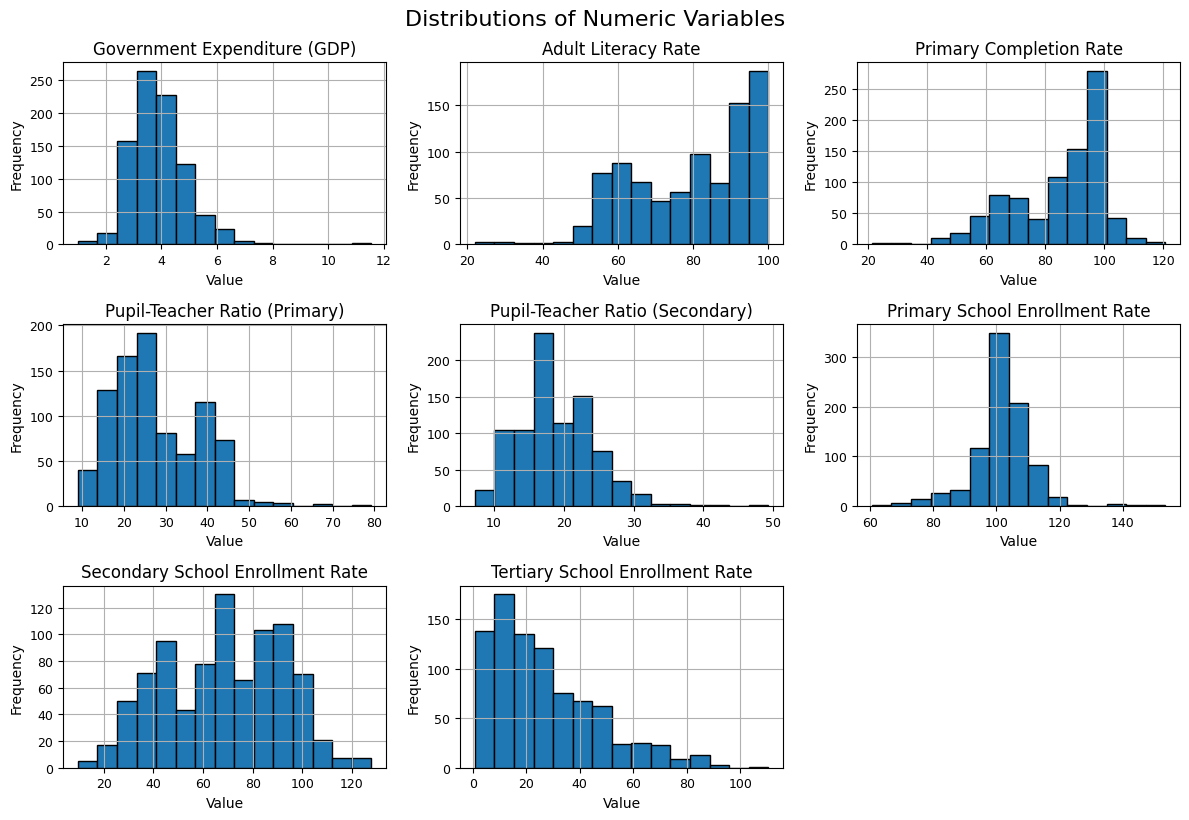

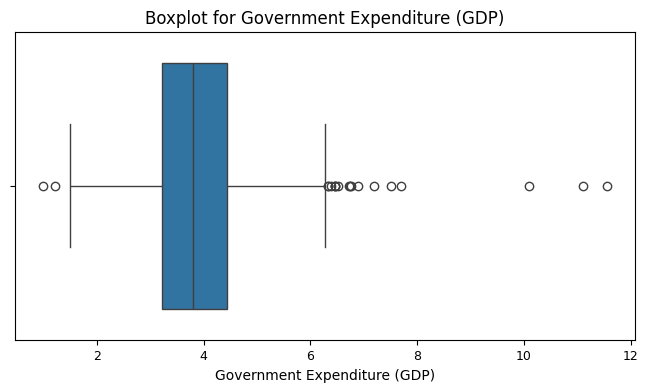

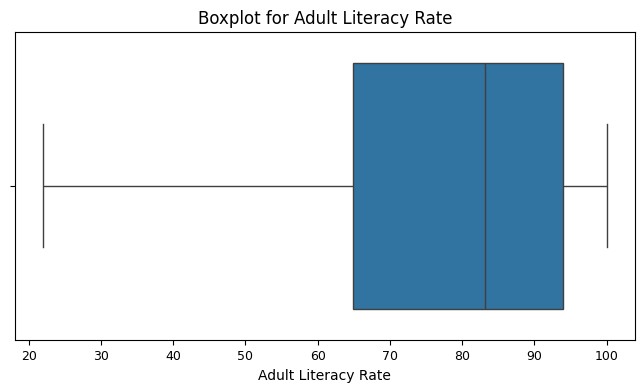

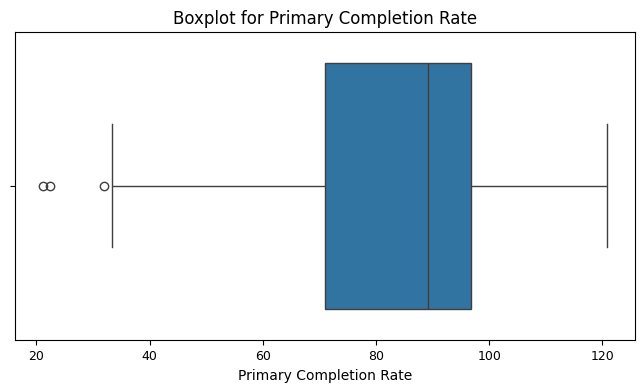

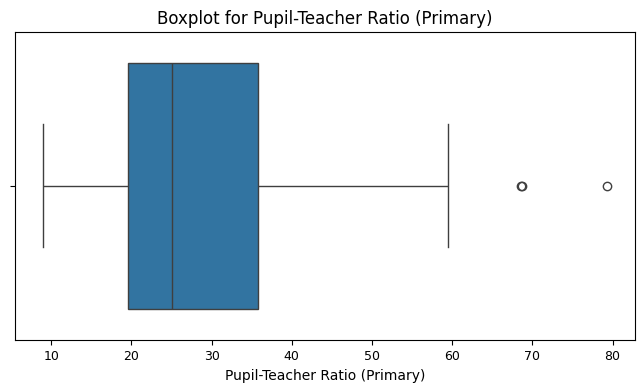

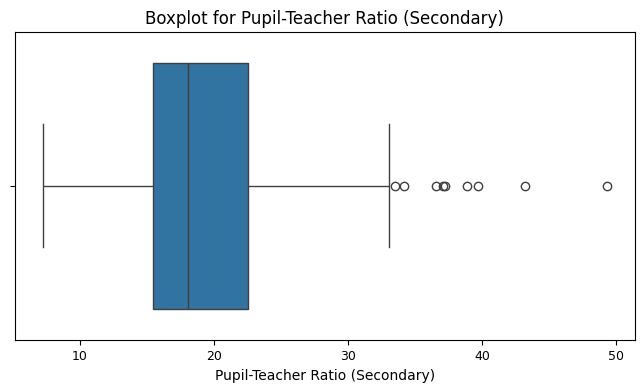

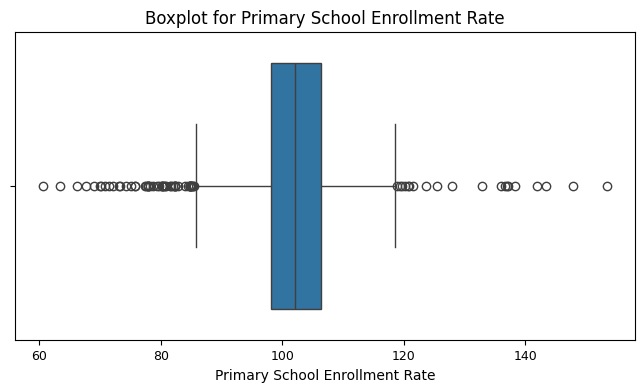

In [10]:
# histograms for numerical columns with adjusted layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))  # create a grid of subplots
axes = axes.flatten()  # flatten the axes array for easy iteration

# list of numerical columns to plot
columns = [
    'Government Expenditure (GDP)',
    'Adult Literacy Rate',
    'Primary Completion Rate',
    'Pupil-Teacher Ratio (Primary)',
    'Pupil-Teacher Ratio (Secondary)',
    'Primary School Enrollment Rate',
    'Secondary School Enrollment Rate',
    'Tertiary School Enrollment Rate'
]

# loop through columns and plot each one in a subplot
for i, column in enumerate(columns):
    ax = axes[i]
    df[column].hist(ax=ax, bins=15, edgecolor='black')
    ax.set_title(column, fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.tick_params(axis='both', labelsize=9)

# remove any empty subplots if columns < grid spaces
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# adjust spacing between subplots
plt.tight_layout()
plt.suptitle('Distributions of Numeric Variables', fontsize=16, y=1.02)  # add a shared title
plt.show()


# boxplots to identify outliers
for column in [
    'Government Expenditure (GDP)',
    'Adult Literacy Rate',
    'Primary Completion Rate',
    'Pupil-Teacher Ratio (Primary)',
    'Pupil-Teacher Ratio (Secondary)',
    'Primary School Enrollment Rate'
]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}', fontsize=12)  # reduce font size of the title
    plt.xlabel(column, fontsize=10)  # reduce font size of the x-axis label
    plt.xticks(fontsize=9)  # reduce font size of x-axis ticks
    plt.show()


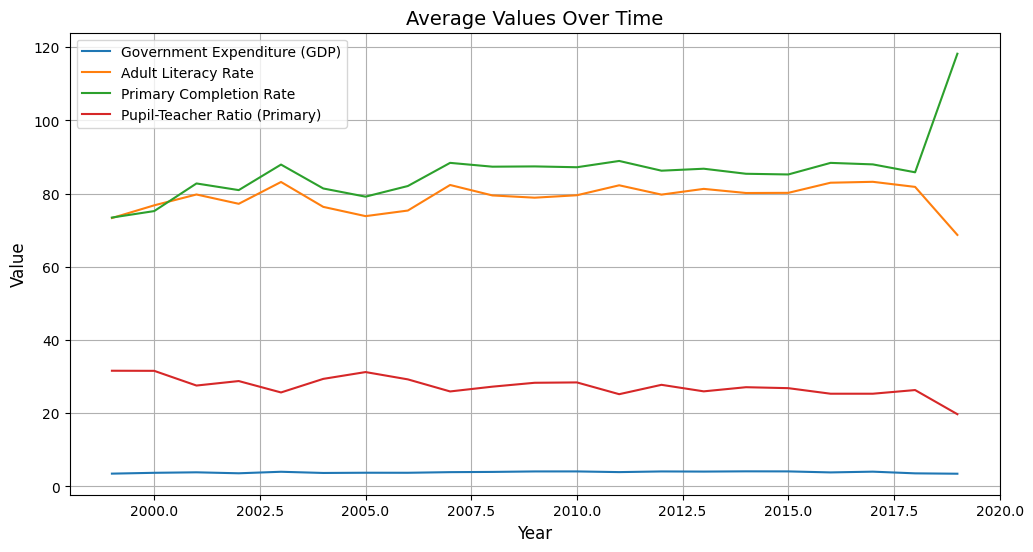

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# calculate annual averages for key indicators
# select only numerical columns for calculating the mean
numerical_columns = df.select_dtypes(include=np.number).columns
yearly_data = df.groupby('Year')[numerical_columns].mean()

# trend plots
plt.figure(figsize=(12, 6))
for column in ['Government Expenditure (GDP)', 'Adult Literacy Rate', 'Primary Completion Rate', 'Pupil-Teacher Ratio (Primary)']:
    plt.plot(yearly_data.index, yearly_data[column], label=column)

plt.title('Average Values Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


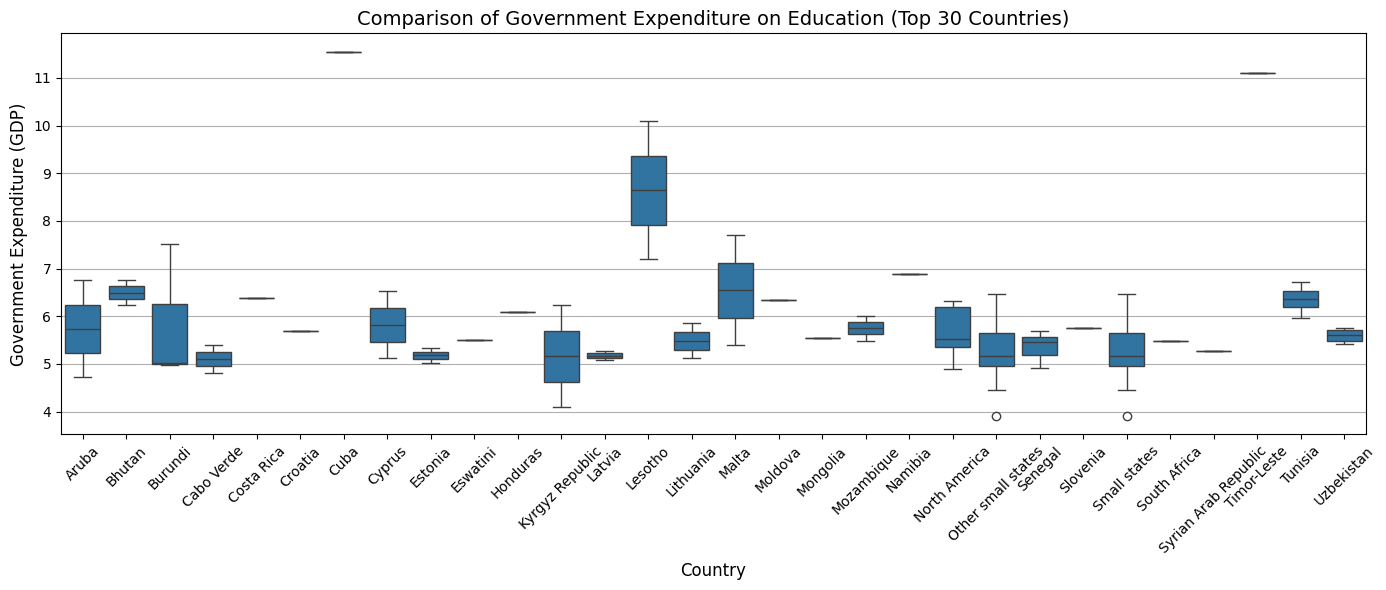

Country
Cuba                              100.000000
Estonia                           100.000000
Lithuania                         100.000000
Latvia                            100.000000
Uzbekistan                        100.000000
Georgia                            99.663416
Slovenia                           99.599998
Tajikistan                         99.349998
Central Europe and the Baltics     99.347141
Kyrgyz Republic                    99.000000
Name: Adult Literacy Rate, dtype: float64


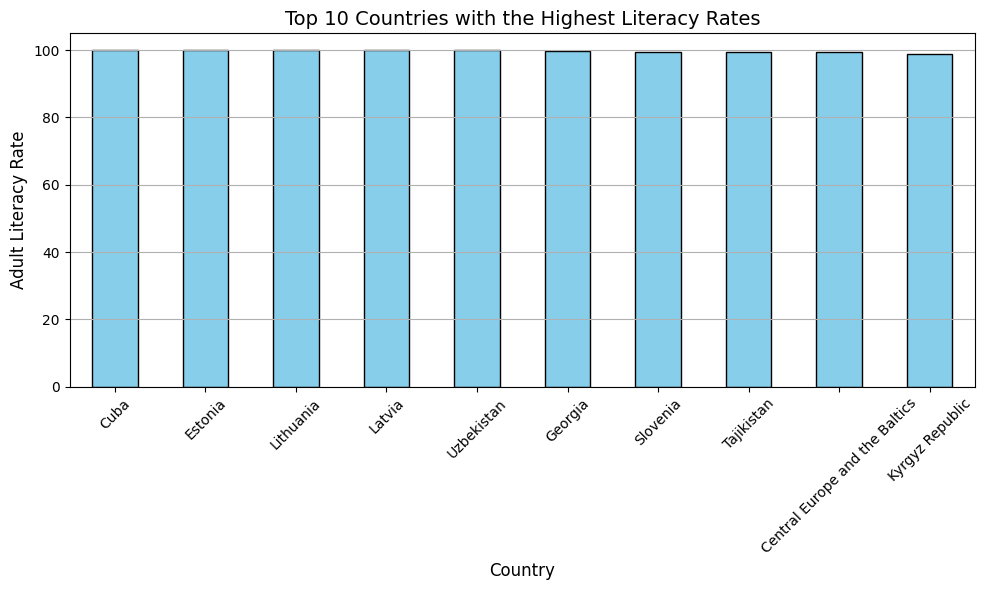

In [12]:
# get the top 20 countries with the highest government expenditure
top_countries = df.groupby('Country')['Government Expenditure (GDP)'].mean().sort_values(ascending=False).head(30)

# boxplot for the top 20 countries
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['Country'].isin(top_countries.index)], x='Country', y='Government Expenditure (GDP)')
plt.title('Comparison of Government Expenditure on Education (Top 30 Countries)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # rotate x-axis labels
plt.xlabel('Country', fontsize=12)
plt.ylabel('Government Expenditure (GDP)', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# top 10 countries with the highest literacy rates
top_literacy = df.groupby('Country')['Adult Literacy Rate'].mean().sort_values(ascending=False).head(10)
print(top_literacy)

# barplot for countries with the highest literacy rates
plt.figure(figsize=(10, 6))
top_literacy.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with the Highest Literacy Rates', fontsize=14)
plt.ylabel('Adult Literacy Rate', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # rotate x-axis labels for better visibility
plt.tight_layout()
plt.grid(axis='y')
plt.show()


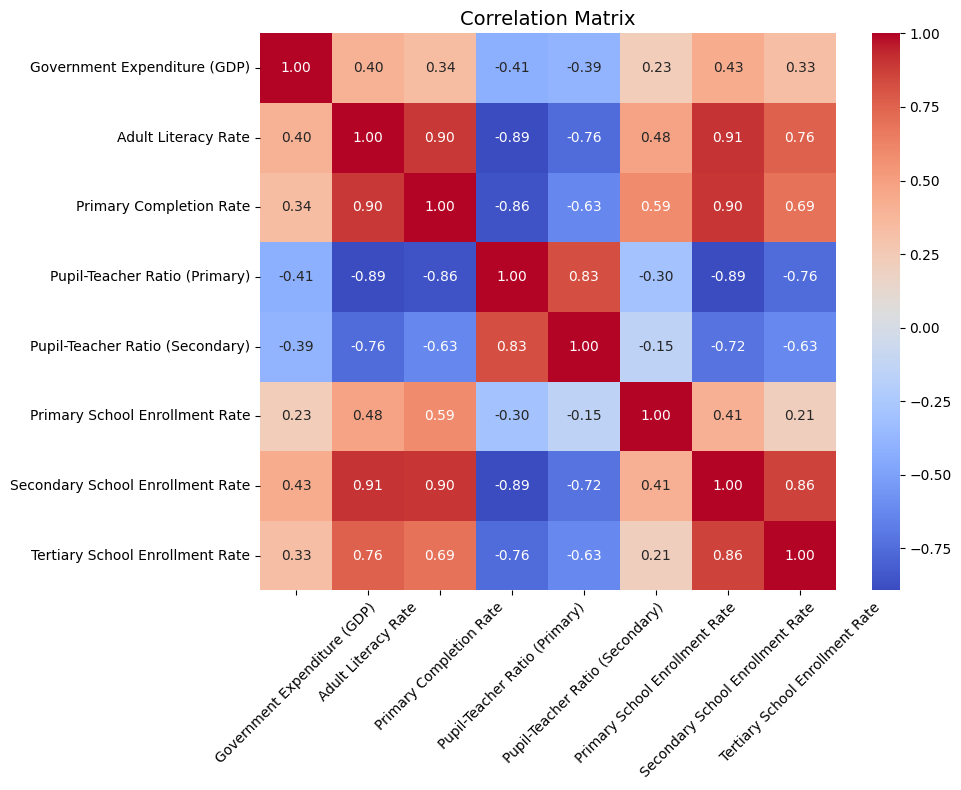

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns with the updated column names
numeric_df = df[['Government Expenditure (GDP)',
                 'Adult Literacy Rate',
                 'Primary Completion Rate',
                 'Pupil-Teacher Ratio (Primary)',
                 'Pupil-Teacher Ratio (Secondary)',
                 'Primary School Enrollment Rate',
                 'Secondary School Enrollment Rate',
                 'Tertiary School Enrollment Rate']]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap for visualizing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Adjust the angle of x and y labels
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()  # To avoid overlapping
plt.show()


# Linear Regression


In [14]:
# prompt: remove outliers from numeric columns of df

import pandas as pd
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Remove outliers from each numeric column
df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
for col in numeric_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

print(df_cleaned.shape)
df.shape

(751, 12)


(871, 12)

In [17]:
import statsmodels.api as sm

# Define dependent variable
y = df_cleaned['Adult Literacy Rate']

# Function to perform OLS regression
def run_ols(x_column, y, title):
    X = df_cleaned[[x_column]]
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X).fit()
    print(f"OLS Summary for {title}:")
    print(model.summary())
    print("\n" + "-" * 80 + "\n")

# Run OLS for each independent variable
run_ols('Pupil-Teacher Ratio (Primary)', y, 'Pupil-Teacher Ratio (Primary)')
run_ols('Government Expenditure (GDP)', y, 'Government Expenditure (GDP)')
run_ols('Primary School Enrollment Rate', y, 'Primary School Enrollment Rate')


OLS Summary for Pupil-Teacher Ratio (Primary):
                             OLS Regression Results                            
Dep. Variable:     Adult Literacy Rate   R-squared:                       0.831
Model:                             OLS   Adj. R-squared:                  0.831
Method:                  Least Squares   F-statistic:                     3694.
Date:                 Thu, 27 Mar 2025   Prob (F-statistic):          9.10e-292
Time:                         22:46:05   Log-Likelihood:                -2393.1
No. Observations:                  751   AIC:                             4790.
Df Residuals:                      749   BIC:                             4799.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [18]:
def run_multiple_ols(columns, y, title):
    X = df_cleaned[columns]
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X).fit()
    print(f"OLS Summary for {title}:")
    print(model.summary())
    print("\n" + "-" * 80 + "\n")

# Run OLS with two independent variables
run_multiple_ols(['Pupil-Teacher Ratio (Primary)', 'Primary School Enrollment Rate'],
                 y,
                 'Pupil-Teacher Ratio (Primary) and Primary School Enrollment Rate')



OLS Summary for Pupil-Teacher Ratio (Primary) and Primary School Enrollment Rate:
                             OLS Regression Results                            
Dep. Variable:     Adult Literacy Rate   R-squared:                       0.859
Model:                             OLS   Adj. R-squared:                  0.859
Method:                  Least Squares   F-statistic:                     2285.
Date:                 Thu, 27 Mar 2025   Prob (F-statistic):          2.72e-319
Time:                         22:46:11   Log-Likelihood:                -2325.1
No. Observations:                  751   AIC:                             4656.
Df Residuals:                      748   BIC:                             4670.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [19]:
# Run OLS with three independent variables
run_multiple_ols(['Pupil-Teacher Ratio (Primary)', 'Primary School Enrollment Rate',
                  'Government Expenditure (GDP)'],
                 y,
                 'Pupil-Teacher Ratio (Primary), Primary School Enrollment Rate, and Government Expenditure (GDP)')

OLS Summary for Pupil-Teacher Ratio (Primary), Primary School Enrollment Rate, and Government Expenditure (GDP):
                             OLS Regression Results                            
Dep. Variable:     Adult Literacy Rate   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.860
Method:                  Least Squares   F-statistic:                     1538.
Date:                 Thu, 27 Mar 2025   Prob (F-statistic):          4.28e-319
Time:                         22:46:17   Log-Likelihood:                -2321.6
No. Observations:                  751   AIC:                             4651.
Df Residuals:                      747   BIC:                             4670.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025 

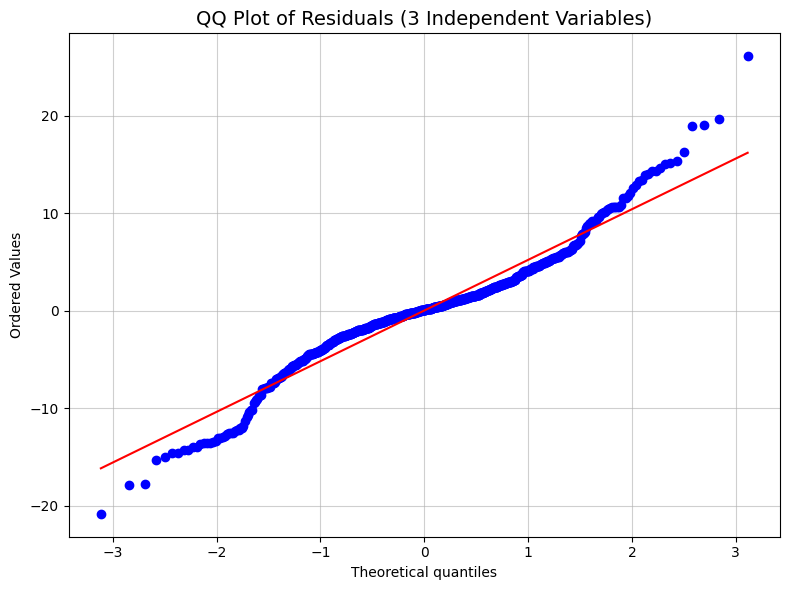

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define independent variables and dependent variable
X = df_cleaned[['Pupil-Teacher Ratio (Primary)', 'Primary School Enrollment Rate', 'Government Expenditure (GDP)']]
X = sm.add_constant(X)  # Add intercept
y = df_cleaned['Adult Literacy Rate']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = y - model.predict(X)

# Plot the QQ Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals (3 Independent Variables)', fontsize=14)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

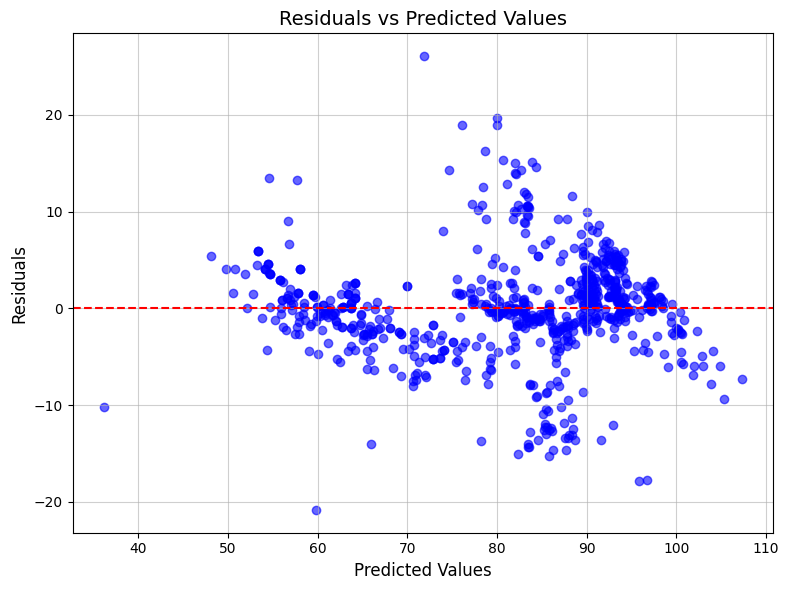

In [21]:
import matplotlib.pyplot as plt

# Define independent variables and dependent variable
X = df_cleaned[['Pupil-Teacher Ratio (Primary)', 'Primary School Enrollment Rate', 'Government Expenditure (GDP)']]
X = sm.add_constant(X)  # Add intercept
y = df_cleaned['Adult Literacy Rate']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Calculate residuals
y_pred = model.predict(X)  # Predicted values
residuals = y - y_pred     # Residuals (actual - predicted)

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()
